<h1>R 무작정 따라하기 8</h1>
<hr>

In [1]:
list.files("./../data/")

[1] "2015년 초미세먼지.xlsx"                               
 [2] "2022년_도로교통공단_시군구별 월별 교통사고 통계.csv"  
 [3] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx" 
 [4] "2022년_도로교통공단_일자별 시군구별 교통사고 건수.csv"
 [5] "2022년_서울_일별평균대기오염도_2022.csv"              
 [6] "air_2021.xlsx"                                        
 [7] "merge.xlsx"                                           
 [8] "naver_news(건국대 글로컬).txt"                        
 [9] "sample-CP949.csv"                                     
[10] "sample-UTF8.csv"                                      
[11] "sample.xlsx"                                          
[12] "score.xlsx"                                           
[13] "경기도 화성시_관광통계_20231025.csv"                  
[14] "고속터미널-23-05.xlsx"                                
[15] "네이버블로그(충주맛집).txt"                           
[16] "데이터과학-중간고사.xlsx"                             
[17] "실습 설문지.xlsx"                                     
[18] "중고차시세.xlsx"                                      
[19] "화재-피해액.xlsx"

In [2]:
library(ggplot2)
library(GGally)
library(factoextra)
library(rpart)
library(rpart.plot)
library(caret)
library(wordcloud)
library(KoNLP)

Warning message:
“package ‘GGally’ was built under R version 4.3.2”
Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Loading required package: lattice

Loading required package: RColorBrewer

Checking user defined dictionary!




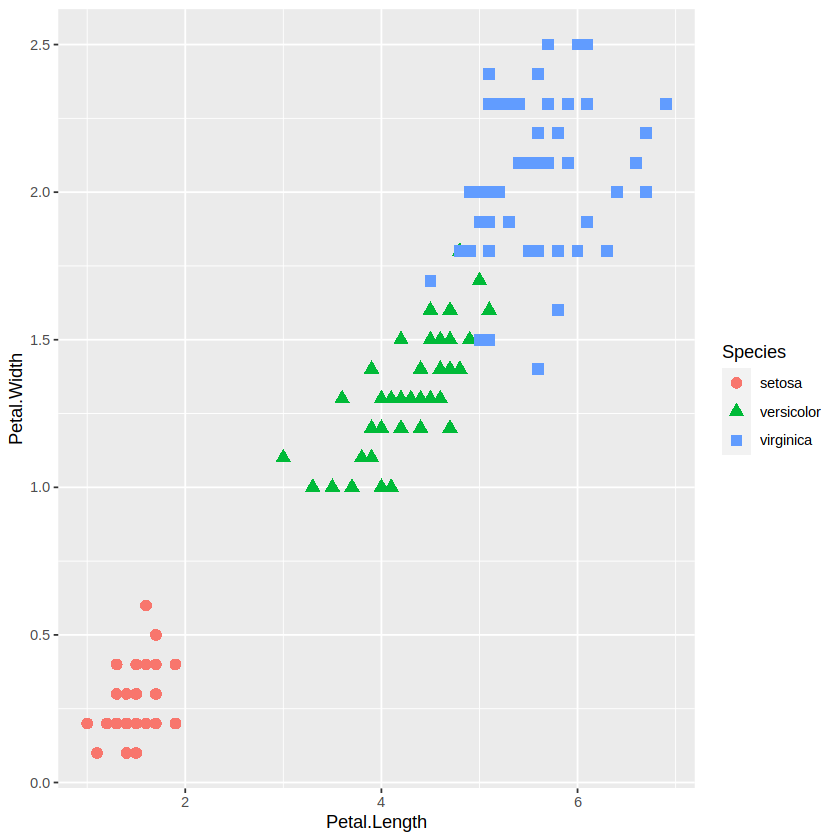

In [3]:
p <- ggplot(iris, aes(Petal.Length, Petal.Width, color = Species,
                      shape = Species))

p + geom_point(size = 3)

In [4]:
petal <- iris[3:5]
head(petal, 10)

,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<fct>
1,1.4,0.2,setosa
2,1.4,0.2,setosa
3,1.3,0.2,setosa
4,1.5,0.2,setosa
5,1.4,0.2,setosa
6,1.7,0.4,setosa
7,1.4,0.3,setosa
8,1.5,0.2,setosa
9,1.4,0.2,setosa


In [5]:
petal.kmeans <- kmeans(petal[1:2], centers = 3, iter.max = 1000)
petal.kmeans

K-means clustering with 3 clusters of sizes 50, 54, 46

Cluster means:
  Petal.Length Petal.Width
1     1.462000    0.246000
2     4.292593    1.359259
3     5.626087    2.047826

Clustering vector:
  [1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

Within cluster sum of squares by cluster:
[1]  2.02200 14.22741 15.16348
 (between_SS / total_SS =  94.3 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [6]:
centers <- as.data.frame(petal.kmeans$centers)
centers

,Petal.Length,Petal.Width
,<dbl>,<dbl>
1,1.462000,0.246000
2,4.292593,1.359259
3,5.626087,2.047826


In [7]:
petal.kmeans$size

[1] 50 54 46

In [8]:
petal.kmeans$cluster

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 3 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 2 3 3 3 3
[112] 3 3 3 3 3 3 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3 3 3 3 3 3 3 2 3 3 3 3 3 3 3 3 3
[149] 3 3

In [9]:
petal$cluster <- petal.kmeans$cluster
petal[120:130, ]

,Petal.Length,Petal.Width,Species,cluster
,<dbl>,<dbl>,<fct>,<int>
120,5.0,1.5,virginica,2
121,5.7,2.3,virginica,3
122,4.9,2.0,virginica,3
123,6.7,2.0,virginica,3
124,4.9,1.8,virginica,2
125,5.7,2.1,virginica,3
126,6.0,1.8,virginica,3
127,4.8,1.8,virginica,2
128,4.9,1.8,virginica,2


In [10]:
table(petal$Species, petal$cluster)

            
              1  2  3
  setosa     50  0  0
  versicolor  0 48  2
  virginica   0  6 44

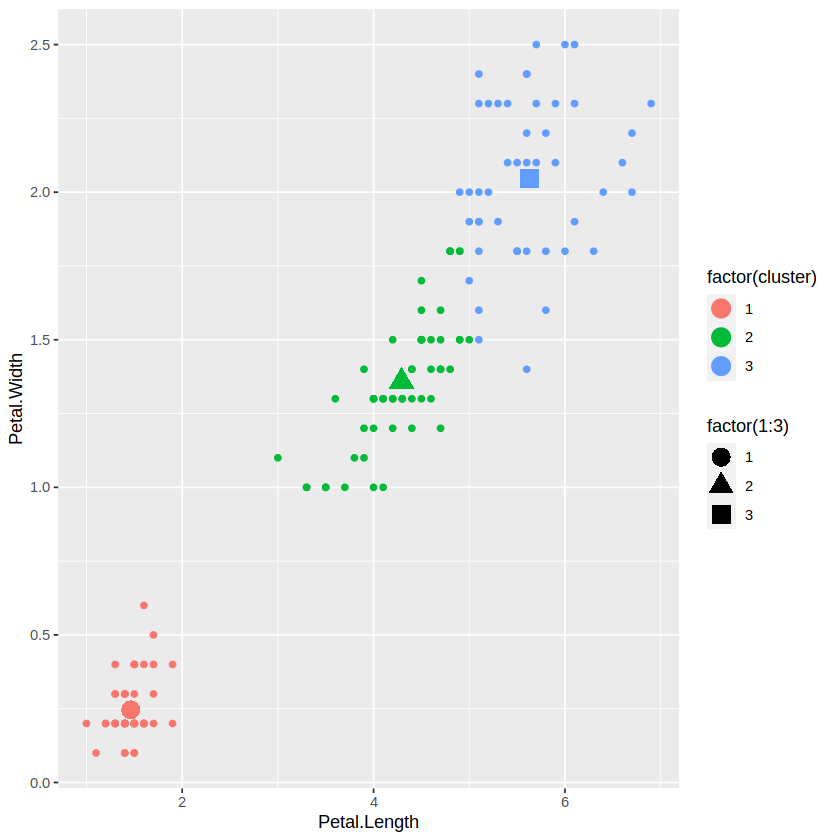

In [11]:
p <- ggplot(petal, aes(Petal.Length, Petal.Width))
p <- p + geom_point(aes(color = factor(cluster)))
p + geom_point(data = centers, aes(Petal.Length, Petal.Width,
                                   color = factor(1:3), shape = factor(1:3)), size = 5)

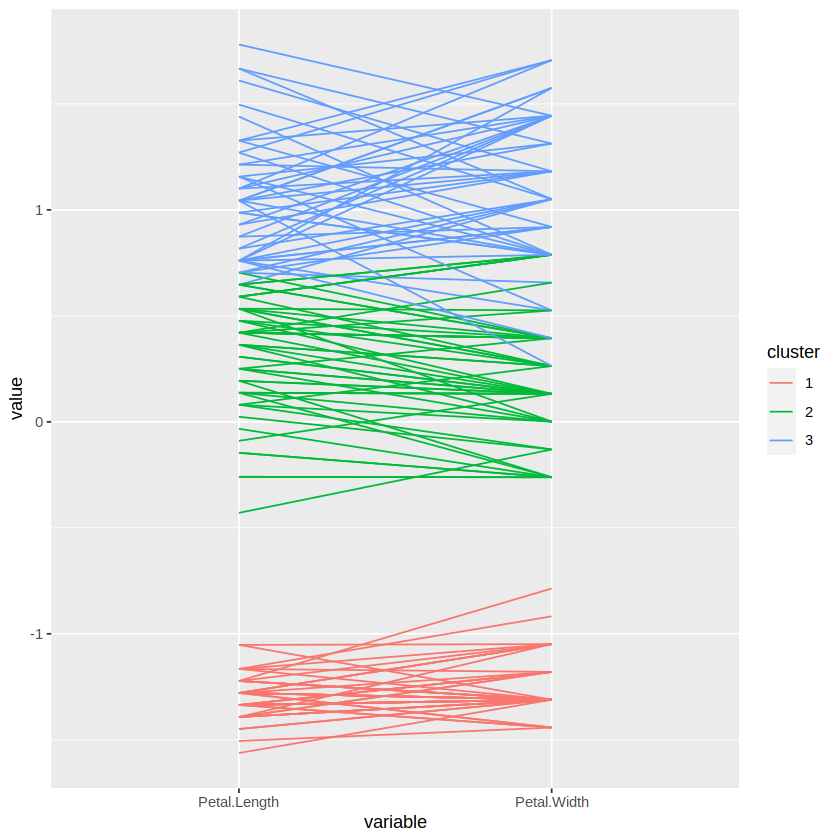

In [12]:
petal$cluster <- as.factor(petal$cluster)
p <- ggparcoord(data = petal, columns = c(1:2),
                groupColumn = 'cluster', scale='std')
p

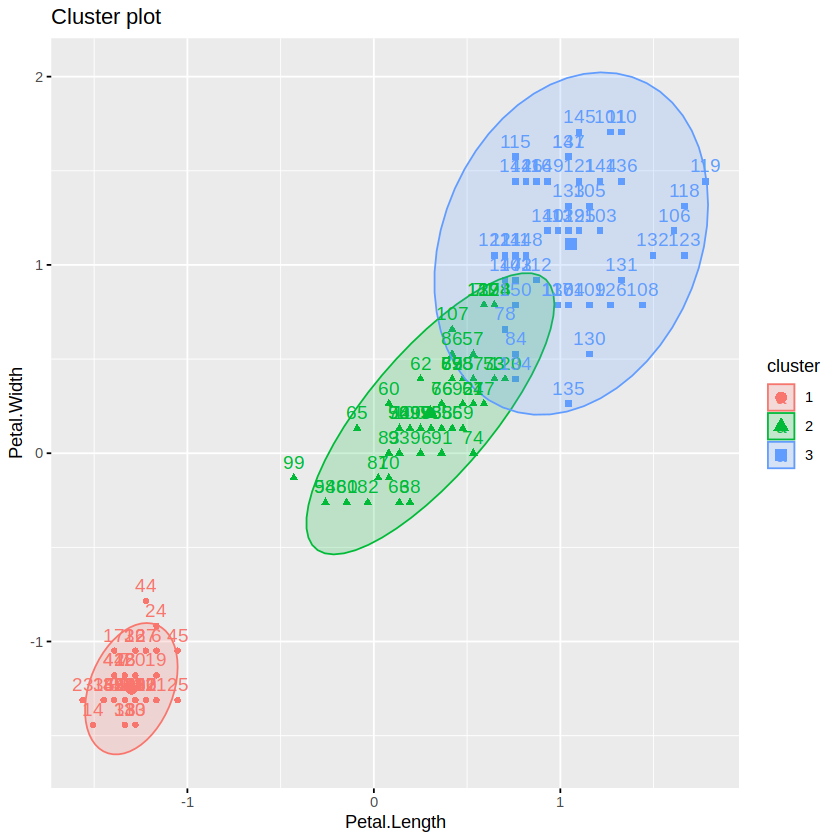

In [13]:
library(factoextra)
fviz_cluster(petal.kmeans, petal[1:2], ellipse.type="norm")

In [14]:
library(rpart)
r <- rpart(Species ~ ., data = iris)
r

n= 150 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 150 100 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 50   0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 100  50 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.75 54   5 versicolor (0.00000000 0.90740741 0.09259259) *
    7) Petal.Width>=1.75 46   1 virginica (0.00000000 0.02173913 0.97826087) *

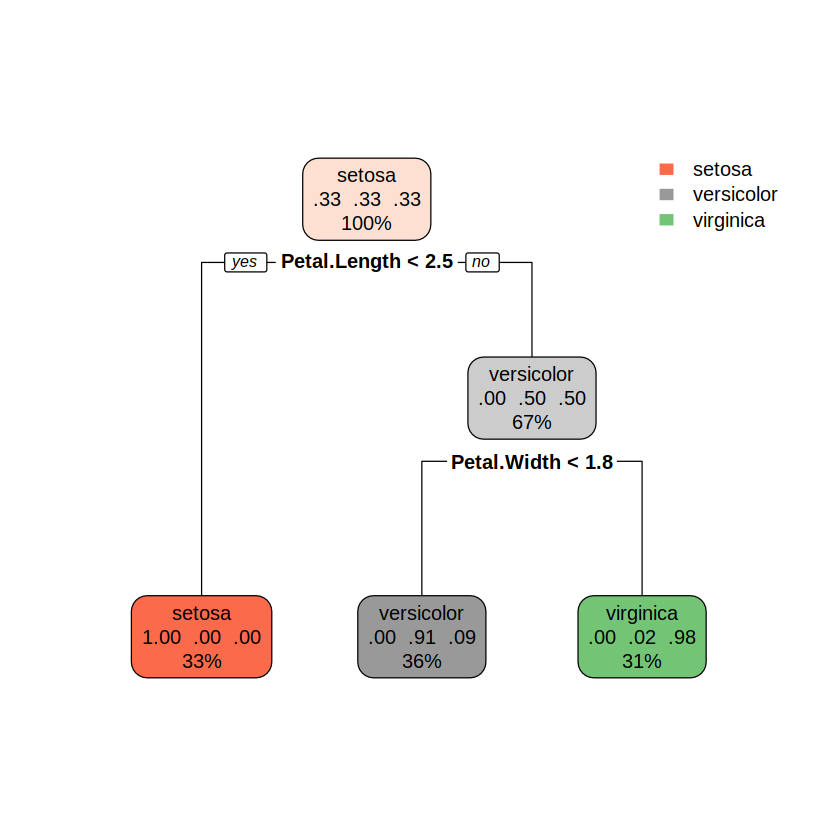

In [15]:
library(rpart.plot)
rpart.plot(r)

In [16]:
newdata <- iris[sample(1:150, 10), ]
newdata

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
81,5.5,2.4,3.8,1.1,versicolor
112,6.4,2.7,5.3,1.9,virginica
72,6.1,2.8,4.0,1.3,versicolor
64,6.1,2.9,4.7,1.4,versicolor
128,6.1,3.0,4.9,1.8,virginica
77,6.8,2.8,4.8,1.4,versicolor
121,6.9,3.2,5.7,2.3,virginica
43,4.4,3.2,1.3,0.2,setosa
29,5.2,3.4,1.4,0.2,setosa


In [17]:
predict <- predict(r, newdata[1:4])
predict <- as.data.frame(predict)
cbind(predict, newdata$Species)

,setosa,versicolor,virginica,newdata$Species
,<dbl>,<dbl>,<dbl>,<fct>
81,0,0.90740741,0.09259259,versicolor
112,0,0.02173913,0.97826087,virginica
72,0,0.90740741,0.09259259,versicolor
64,0,0.90740741,0.09259259,versicolor
128,0,0.02173913,0.97826087,virginica
77,0,0.90740741,0.09259259,versicolor
121,0,0.02173913,0.97826087,virginica
43,1,0.00000000,0.00000000,setosa
29,1,0.00000000,0.00000000,setosa


In [18]:
p <- predict(r, newdata[1:4], type = 'class')
as.data.frame(p)

,p
,<fct>
81,versicolor
112,virginica
72,versicolor
64,versicolor
128,virginica
77,versicolor
121,virginica
43,setosa
29,setosa


In [19]:
library(caret)
indexTrain <- createDataPartition(iris$Species, p = 0.7, list = F)

training <- iris[ indexTrain, ]
testing <- iris[ -indexTrain, ]

In [20]:
str(training)

'data.frame':	105 obs. of  5 variables:
 $ Sepal.Length: num  5.1 4.9 4.6 5 5 4.4 4.9 5.4 4.8 4.3 ...
 $ Sepal.Width : num  3.5 3 3.1 3.6 3.4 2.9 3.1 3.7 3.4 3 ...
 $ Petal.Length: num  1.4 1.4 1.5 1.4 1.5 1.4 1.5 1.5 1.6 1.1 ...
 $ Petal.Width : num  0.2 0.2 0.2 0.2 0.2 0.2 0.1 0.2 0.2 0.1 ...
 $ Species     : Factor w/ 3 levels "setosa","versicolor",..: 1 1 1 1 1 1 1 1 1 1 ...


In [21]:
table(training$Species)


    setosa versicolor  virginica 
        35         35         35 

In [22]:
table(testing$Species)


    setosa versicolor  virginica 
        15         15         15 

In [23]:
library(rpart)
r <- rpart(Species ~. , data = training)
r

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 70 setosa (0.33333333 0.33333333 0.33333333)  
  2) Petal.Length< 2.45 35  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.45 70 35 versicolor (0.00000000 0.50000000 0.50000000)  
    6) Petal.Width< 1.55 35  1 versicolor (0.00000000 0.97142857 0.02857143) *
    7) Petal.Width>=1.55 35  1 virginica (0.00000000 0.02857143 0.97142857) *

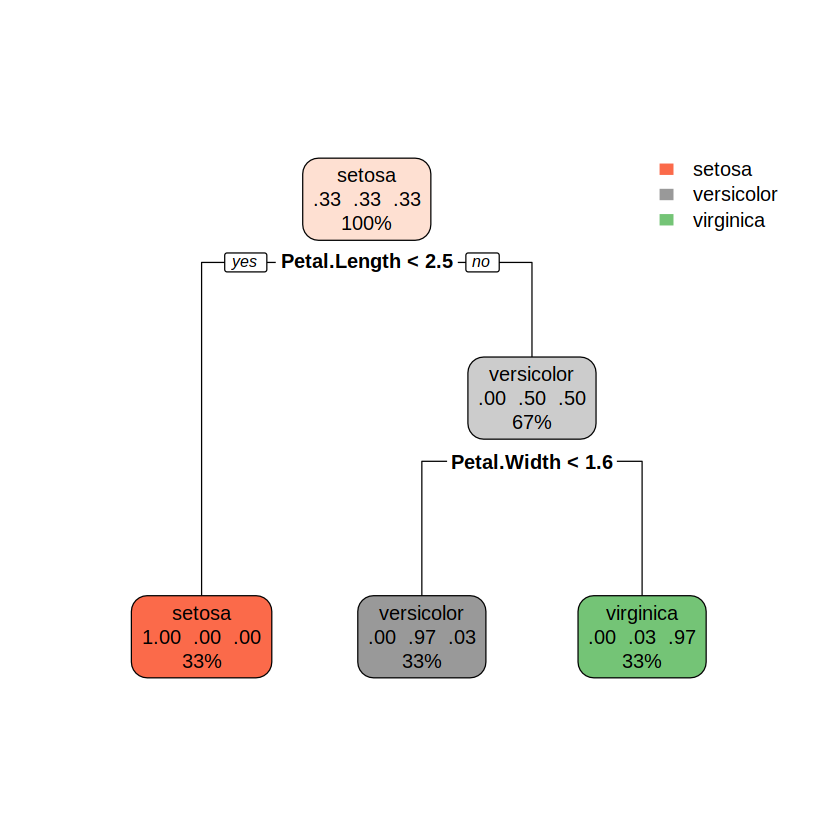

In [24]:
library(rpart.plot)
rpart.plot(r)

In [25]:
testing$predict <- predict (r, testing, type = 'class' )
tail(testing, 10)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,predict
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
119,7.7,2.6,6.9,2.3,virginica,virginica
126,7.2,3.2,6.0,1.8,virginica,virginica
131,7.4,2.8,6.1,1.9,virginica,virginica
132,7.9,3.8,6.4,2.0,virginica,virginica
134,6.3,2.8,5.1,1.5,virginica,versicolor
135,6.1,2.6,5.6,1.4,virginica,versicolor
143,5.8,2.7,5.1,1.9,virginica,virginica
145,6.7,3.3,5.7,2.5,virginica,virginica
147,6.3,2.5,5.0,1.9,virginica,virginica


In [26]:
table(testing$Species, testing$predict)

            
             setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         11         4
  virginica       0          2        13

In [27]:
p <- predict (r, testing, type = 'class')
confusionMatrix(p, testing$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         15          0         0
  versicolor      0         11         2
  virginica       0          4        13

Overall Statistics
                                          
               Accuracy : 0.8667          
                 95% CI : (0.7321, 0.9495)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 1.905e-13       
                                          
                  Kappa : 0.8             
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            0.7333           0.8667
Specificity                 1.0000            0.9333           0.8667
Pos Pred Value              1.0000            0.8462           0.7647
Neg Pred Value              1.0000            0.8750           0.9286
P

In [28]:
library(KoNLP)
library(wordcloud)

In [29]:
list.files("./../data")

[1] "2015년 초미세먼지.xlsx"                               
 [2] "2022년_도로교통공단_시군구별 월별 교통사고 통계.csv"  
 [3] "2022년_도로교통공단_시군구별 월별 교통사고 통계.xlsx" 
 [4] "2022년_도로교통공단_일자별 시군구별 교통사고 건수.csv"
 [5] "2022년_서울_일별평균대기오염도_2022.csv"              
 [6] "air_2021.xlsx"                                        
 [7] "merge.xlsx"                                           
 [8] "naver_news(건국대 글로컬).txt"                        
 [9] "sample-CP949.csv"                                     
[10] "sample-UTF8.csv"                                      
[11] "sample.xlsx"                                          
[12] "score.xlsx"                                           
[13] "경기도 화성시_관광통계_20231025.csv"                  
[14] "고속터미널-23-05.xlsx"                                
[15] "네이버블로그(충주맛집).txt"                           
[16] "데이터과학-중간고사.xlsx"                             
[17] "실습 설문지.xlsx"                                     
[18] "중고차시세.xlsx"                                      
[19] "화재-피해액.xlsx"

In [30]:
text <- readLines("./../data/네이버블로그(충주맛집).txt", encoding = "UTF-8")
text[1:10]

[1] "충주 은혜 불고기 냉동 삼겹살이 맛있는 충주 현지인 추천 맛집"                                                                                                                                                        
 [2] "어차피 가족들이 같이 운영하는 곳이기 때문!! 현지인 추천 맛집 인증합니다!! 충주맛집 충주삼겹살맛집 은혜삼겹살 은혜불고기 충주은혜불고기 충주은혜삼겹살 충주대패삼겹살 대패삼겹살맛집"                                
 [3] ""                                                                                                                                                                                                                   
 [4] "충주 터줏골명가-충주시청근처 짜글이맛집에서 점심식사"                                                                                                                                                               
 [5] "충주 터줏골명가-충주시청근처 짜글이맛집에서 점심식사 느낌이 정말 매력적이후로 반드시 재방문할 고정관념이 100%이예요. 둘이 같이 방문한 식당에서의 식사가 최고로 만족스러웠던 경험이었습니다. 본... "                 
 [6] ""                                                                                                                                                                                                                   
 [7] "[충주칼국수맛집] 동동주와 쫀득한 옹심이 한상_감자꽃옹심이"                                                                                                                                                          
 [8] "&lt;감자꽃옹심이&gt; 식당위치: 충북 충주시 연수동편3길 22 전화번호: 0507-1391-8924 영업시간: 11시~20시... 핫한 충주시장님도 다녀갔네요 와 밑반찬과 보리밥이 나오는데 역시나 고추장에 비벼 먹으면 꿀맛 다만 반찬... "
 [9] ""                                                                                                                                                                                                                   
[10] "충주맛집, 터줏골명가 매운갈비찜"

In [31]:
nouns <- sapply(text, extractNoun, USE.NAMES = F)
nouns[1:5]

[[1]]
 [1] "충주"   "은혜"   "불고기" "냉동"   "삼겹살" "충주"   "현지인" "추천"  
 [9] "맛"     "집"    

[[2]]
 [1] "가족"           "들이"           "운영"           "곳"            
 [5] "때문"           "현지인"         "추천"           "맛집"          
 [9] "인증"           "충주맛집"       "충주삼겹살맛집" "은혜"          
[13] "삼겹살"         "은혜"           "불고기"         "충주은혜불고기"
[17] "충주은혜삼겹살" "충주대패삼겹살" "대패"           "삼겹살"        
[21] "맛"             "집"            

[[3]]
[1] ""

[[4]]
[1] "충주"                    "터줏골명가-충주시청근처"
[3] "짜글이맛집에서"          "점심"                   
[5] "식"                      "사"                     

[[5]]
 [1] "충주"                    "터줏골명가-충주시청근처"
 [3] "짜글이맛집에서"          "점심식사"               
 [5] "매력적이후로"            "재방문할"               
 [7] "고정관념"                "100"                    
 [9] "둘"                      "방문"                   
[11] "한"                      "식당"                   
[13] "식사"                    "최고"                   
[15] "만족"                    "경험"

In [32]:
nouns <- unlist(nouns)
nouns[1:20]

[1] "충주"     "은혜"     "불고기"   "냉동"     "삼겹살"   "충주"    
 [7] "현지인"   "추천"     "맛"       "집"       "가족"     "들이"    
[13] "운영"     "곳"       "때문"     "현지인"   "추천"     "맛집"    
[19] "인증"     "충주맛집"

In [33]:
nouns <- gsub("\\d+", "", nouns)
nouns <- nouns[nchar(nouns) > 1]

nouns[1:20]

[1] "충주"           "은혜"           "불고기"         "냉동"          
 [5] "삼겹살"         "충주"           "현지인"         "추천"          
 [9] "가족"           "들이"           "운영"           "때문"          
[13] "현지인"         "추천"           "맛집"           "인증"          
[17] "충주맛집"       "충주삼겹살맛집" "은혜"           "삼겹살"

In [34]:
wordcount <- table(nouns)

head(sort(wordcount, decreasing = TRUE), 30)

nouns
      충주       맛집   충주맛집 터줏골명가       숲속     충주시     장수촌 
       543        331        298        156        107        105         99 
      추천       충북       음식       방문     짜글이       위치     분위기 
        94         83         81         71         68         66         65 
    충주점       식사       오늘      ⠀⠀⠀⠀⠀   터줏골명       메뉴 후라토식당 
        65         60         57         56         51         44         44 
      시청       안녕     서비스       연수     충주에       소개       유명 
        43         43         41         38         37         35         33 
      근처       만족 
        32         32 

In [35]:
nouns <- gsub("충주","", nouns)
nouns <- gsub("맛집","", nouns)
nouns <- gsub("충주맛집","", nouns)
nouns <- gsub("충주시","", nouns)
nouns <- gsub("추천","", nouns)
nouns <- gsub("충북","", nouns)
nouns <- gsub("위치","", nouns)
nouns <- gsub("시청","", nouns)
nouns <- gsub("충주점","", nouns)

nouns <- nouns[nchar(nouns) > 1]
wordcount <- table(nouns)
head(sort(wordcount, decreasing = TRUE), 50)

nouns
터줏골명가       숲속     장수촌       음식     짜글이       방문     분위기 
       167        107        101         81         81         71         66 
      식사       카페       오늘      ⠀⠀⠀⠀⠀   터줏골명     데이트 후라토식당 
        60         59         57         56         51         47         45 
      메뉴     연수동       안녕     서비스       여행       연수       소개 
        44         44         43         41         40         40         35 
      근처       유명       으로       만족       시간     치히로     삼겹살 
        34         33         33         32         32         32         31 
      친절       매장       해서       깔끔       업체     터줏골   포스팅은 
        31         30         30         29         29         29         29 
      주소 가볼만한곳       제공       식당       친구   카쿠레가       해당 
        27         26         26         25         25         25         25 
    케이크       특별   내돈내산 매운갈비찜         ..         []       덮밥 
        24         24         23         23         22         22         21 
  신연수동 
        21 

In [36]:
nouns <- gsub("음식","", nouns)
nouns <- gsub("방문","", nouns)
nouns <- gsub("카페","", nouns)
nouns <- gsub("오늘","", nouns)
nouns <- gsub("으로","", nouns)
nouns <- gsub("충북","", nouns)
nouns <- gsub("위치","", nouns)
nouns <- gsub("시청","", nouns)
nouns <- gsub("충주점","", nouns)

nouns <- nouns[nchar(nouns) > 1]
wordcount <- table(nouns)
head(sort(wordcount, decreasing = TRUE), 50)

nouns
터줏골명가       숲속     장수촌     짜글이     분위기       식사      ⠀⠀⠀⠀⠀ 
       167        107        101         81         67         60         56 
  터줏골명     데이트     연수동 후라토식당       메뉴       안녕       수다 
        51         48         46         45         44         43         42 
    서비스       여행       연수       소개       근처       유명       만족 
        41         40         40         35         34         33         32 
      시간     치히로     삼겹살       친절       매장       해서       깔끔 
        32         32         31         31         30         30         29 
      업체     터줏골   포스팅은       주소 가볼만한곳       제공       식당 
        29         29         29         27         26         26         25 
      친구   카쿠레가       해당     케이크       특별         ..         [] 
        25         25         25         24         24         23         23 
  내돈내산 매운갈비찜       덮밥   신연수동       점심       가성       가족 
        23         23         21         21         21         20         20 
      간판 
        20 

Warning message in wordcloud(names(wordcount), freq = wordcount, scale = c(11, 1), :
“터줏골명가 could not be fit on page. It will not be plotted.”


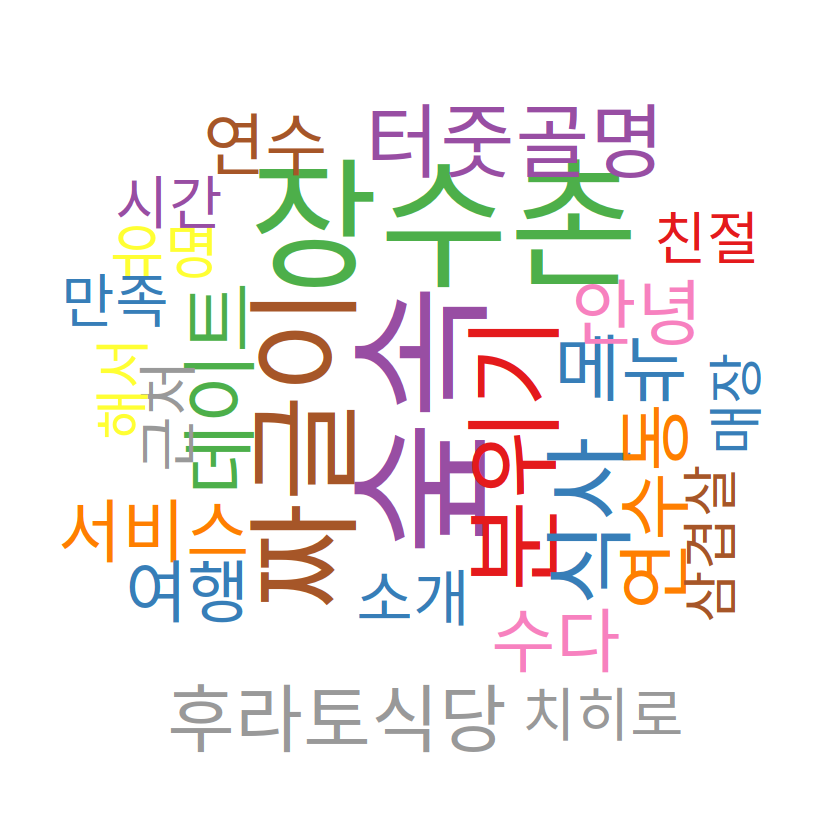

In [37]:
palete <- brewer.pal(9,"Set1")
wordcount <- table(nouns)
wordcloud(names(wordcount),freq=wordcount,scale=c(11,1),rot.per = 0.25, min.freq=30, 
          random.order = F, random.color = T, colors = palete)